<a href="https://colab.research.google.com/github/qTronor/BigData_lessons/blob/main/BigData_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import plotly.express as px

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = datasets.load_wine(as_frame = True)

In [ ]:
predictors = data.data
target = data.target
target_names = data.target_names

In [ ]:
print(predictors.head(5), '\n\nЦелевая переменная')
print(target.head(5))
print(target_names)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

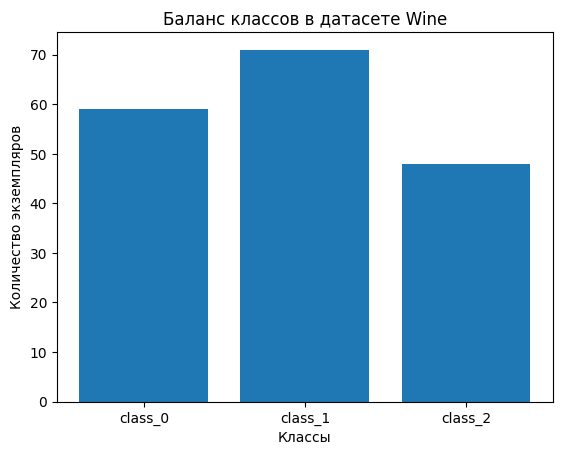

In [ ]:
class_labels, class_counts = np.unique(data.target, return_counts=True)

# Создайте гистограмму
plt.bar(class_labels, class_counts, tick_label=data.target_names)
plt.xlabel("Классы")
plt.ylabel("Количество экземпляров")
plt.title("Баланс классов в датасете Wine")
plt.show()

По данной гистограмме мы узнали количество классов и количество экземпляров каждого класса

# Разбить выборку на тренировочную и тестовую. Тренировочная для обучения модели, тестовая для проверки ее качества.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, shuffle = True)

print("Размер обучающей выборки", x_train.shape, '\n',
      "Размер признаков тестовой выборки", x_test.shape, '\n',
      "Размер целевого показателя обучающей выборки", y_train.shape, '\n',
      "Размер показателей тестовой выборки", y_test.shape, '\n')

Размер обучающей выборки (142, 13) 
 Размер признаков тестовой выборки (36, 13) 
 Размер целевого показателя обучающей выборки (142,) 
 Размер показателей тестовой выборки (36,) 



# Применить алгоритмы классификации: логистическая регрессия, SVM, KNN. Построить матрицу ошибок по результатам работы моделей (использовать confusion_matrix из sklearn.metrics).

In [ ]:
model = LogisticRegression(solver='newton-cg', random_state=271) # Использован алгоритм оптимизации solver = 'newton-cg'
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print("Предсказанные значения: ", y_predict)
print("Исходные значения: ", np.array(y_test))

Предсказанные значения:  [0 1 0 0 0 0 2 2 1 1 0 0 1 1 2 2 1 1 1 0 0 0 0 1 1 1 0 0 2 1 1 2 0 1 1 1]
Исходные значения:  [0 1 0 0 0 0 2 2 1 1 0 0 1 1 2 2 1 1 1 0 0 0 0 1 1 2 0 0 2 1 1 2 0 1 1 1]


In [ ]:
confusion = confusion_matrix(y_test, y_predict)

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion, text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

fig.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        15
           2       1.00      0.86      0.92         7

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



# SVM

In [ ]:
param_kernel = ("linear", "rbf", "poly", "sigmoid")
parameters = {'kernel': param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv = 6)
grid_search_svm.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [ ]:
best_model = grid_search_svm.best_estimator_

In [ ]:
best_model.kernel

'linear'

In [ ]:
svm_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [ ]:
confusion = confusion_matrix(y_test, svm_pred)

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion, text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

fig.show()

# KNN

In [ ]:
number_of_neighbors = np.arange(3, 10)

model_KNN = KNeighborsClassifier()
params = {"n_neighbors": number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN, param_grid = params, cv = 6)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([3, 4, 5, 6, 7, 8, 9])})

In [ ]:
grid_search.best_score_

0.7539251207729469

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn_preds = grid_search.predict(x_test)

In [ ]:
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.60      0.82      0.69        11
           2       0.71      0.38      0.50        13

    accuracy                           0.72        36
   macro avg       0.72      0.73      0.71        36
weighted avg       0.73      0.72      0.70        36



In [ ]:
confusion = confusion_matrix(y_test, knn_preds)

plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion, text_auto=True)
fig.update_layout(xaxis_title='Target', yaxis_title='Prediction')

fig.show()

# Сравнить результаты классификации, используя accuracy, precision, recall и f1-меру

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        15
           2       1.00      0.86      0.92         7

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [ ]:
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.60      0.82      0.69        11
           2       0.71      0.38      0.50        13

    accuracy                           0.72        36
   macro avg       0.72      0.73      0.71        36
weighted avg       0.73      0.72      0.70        36



 Логистическая регрессия и SVM проявляют хорошую производительность и подходят для этой задачи классификации. KNN показывает более низкую производительность.